<a href="https://colab.research.google.com/github/pranav-kaushal/NLP-Project-Sentiment-Analysis/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scotiabank Twitter Sentiment Analysis

API account
https://developer.twitter.com/en/portal/dashboard

In [17]:
# Install Libraries
#!pip install textblob
#!pip install tweepy
#!pip install langdetect
#!pip install nltk
#!pip install unidecode

In [18]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy  # https://docs.tweepy.org/en/latest/getting_started.html#introduction
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#import pycountry
import re
import string
!pip install unidecode
!pip install textaugment

import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw')
nltk.download('stopwords')
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt
import unidecode
import spacy
import unicodedata

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Authentication Keys (Individual Account)

In [28]:
# Authentication
consumerKey = "Gqxmwe06eIqw0NBmCi0L1rmbh"
consumerSecret = "cborR6m0P5LnLB1U2WV4Wz4zI4Wazs9BE1v31x2bcMeeSkm0pf"
accessToken = "1378575615981457409-Aotg3k1WfJu8l8kM8sbs2utHbTFeaO"
accessTokenSecret = "RmH71WeV1XyF66veJJh78vILJ5lt5MqaNNPpbQqZ8E2jm"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Gathering Tweets- Tweet cap 
500,000 Tweets / month
PER PROJECT

In [31]:
#Keyword Search and No of Tweets to capture

search_keyword = 'scotiabank'
no_Tweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=search_keyword).items(no_Tweet)

Please enter how many tweets to analyze: 100


In [32]:
# Using a for loop to convert the tweets int a data frame for further exploration and data cleaning

tweet_list = []
for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)

#tweet_list
#tw_list = pd.DataFrame(tweet_list)

In [33]:
# Print and analyze the tweets in raw text
tweet_list[0:10]

['Maldito scotiabank inútil',
 '@Billy_chilly @mrgrozz Make a deal with Trudeau where we allow him to do his “fake fall down the stairs” party tric… https://t.co/7EHPaTiR4q',
 'That crowd once again rockin the Scotiabank Arena !! Can’t recall hearing it that loud on back to back games !! 😉😂 #LeafsForever',
 ".@ScotiaEconomics' Global Week Ahead (April 30): The Job of Central Bankers is Jobs. Full report:… https://t.co/bGnZDJJ9hh",
 '@scotiabank True dis❤️❤️❤️',
 "It's time for the 3rd period at Scotiabank Arena.\n\n#VANvsTOR",
 'RT @amoralesan: Mañana desde 8 am en Youtube nuevo Café Picante PARO: ¡NO MAS ABUSOS!  POR UN NUEVO MODELO DE PAÍS  Análisis  y reflexiones…',
 'RT @amoralesan: Mañana desde 8 am en Youtube nuevo Café Picante PARO: ¡NO MAS ABUSOS!  POR UN NUEVO MODELO DE PAÍS  Análisis  y reflexiones…',
 '@FultonReed6 The only time I notice is on the Leafs away helmet - the red Scotiabank logo stands out',
 'ATM is open at Scotiabank.\n\nATM = Auston Taylour Matthews']

In [90]:
# For loop to convert to a dataset
for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet)

In [36]:
# To view full text in pandas dataset
pd.set_option('display.max_colwidth', None)

# Renaming 0 column header to tweets
tweet_list.columns = ['tweets']

tweet_list.head(5)

AttributeError: ignored

In [43]:
# Converting the list to Dataframe for further exploration
tw_list = pd.DataFrame(tweet_list)
#tw_list["text"] = tw_list[0]
#tw_list.to_excel("alltweets.xlsx")  ----- These have already been downloaded

In [94]:
# Create a copy of the dataframe to work on
tw_list1 = tw_list.copy()

In [193]:
# Now, we can use pandas read_excel after installing the excel importer.
!pip install -q xlrd
tw_list1 = pd.read_excel('/content/sample_data/alltweets.xlsx')


In [194]:
tw_list1

tweets
0       RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…
1     @SaddyFandino @PoliciaColombia @AlvaroUribeVel Le recuerdo los saqueos de Cali?\n\nAdemás ellos llevan toda la semana… https://t.co/xi2ZqGatqJ
2       RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…
3       RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…
4       RT @scotiabank: 1/2 Congratulations to the winners of the Canadian Foundation for Economic Education’s Virtual Money Fair, sponsored by Sco…
...                                                                                                                                              ...
1995  RT @NHL: 🍁 OH, CANADA! 🍁\n\nThe @MapleLeafs are the first in the @scotiabank North Division to clinch a spot in the #StanleyCup Playoffs! htt…
1996           @whatsup29832102 @MathisVaillanc1 @NickSuzukisNose @SamTML10 @NHL @MapleLeafs @scotiabank LMAO BRO WHAT DOES WAR HAVE TO DO WITH THIS
1997            @KristinYoun9 @NHL @MapleLeafs @scotiabank They just said that they were the first team to clinch a playoff spot 😂. Let it go Karen.
1998    RT @TheChampions: Vote now for the Scotiabank Man of the Match between @ColumbusCrewSC and @Rayados | #SCCL21 @ScotiabankFC https://t.co/ba…
1999                         @JonathanDrewan @NickSuzukisNose @SamTML10 @MathisVaillanc1 @NHL @MapleLeafs @scotiabank Wrong… https://t.co/EBgjnSqJSD

[2000 rows x 1 columns]

## Using Pipeline to clean text

In [195]:
# Check for duplicates and drop them.
tw_list1['tweets'].drop_duplicates(inplace = True)

In [196]:
tw_list1.count()

tweets    2000
dtype: int64

Make text lowercase
Remove punctuation
Remove emoji’s
Remove stopwords
Lemmatization

In [197]:
#Cleaning pipeline (RT, Punctuation etc)
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english') + stopwords.words('spanish')+['http','rt','https'])

lemmer = WordNetLemmatizer()

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()

    #Removing RT
    x = re.sub('RT @\w+: '," ",x)

    # Remove all single characters
    x = re.sub(r'\s+[a-zA-Z]\s+', ' ',x)

    # Remove punctuation
    x = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
    
    # Lower case
    x = x.lower()

    # Remove non-unicode
    x = unidecode.unidecode(x)
    
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x)

In [198]:
# Test preprocessing pipeline
preprocess('@ RT http t co pbxlonxhsj michael retamal scotiabank')

'co pbxlonxhsj michael retamal scotiabank'

In [199]:
# Tweets before preprocessing
tw_list2 = tw_list1.values.tolist()

In [200]:
# Import re module to use regular expression
import re
# Declare a list that contains the search word
search_word = "playoff"
list1 = []
# Using lambda expression filter the data
for x in tw_list1['tweets']:
  if "playoff" not in x:
    list1.append(x)
  elif "arena" not in x:
    list1.append(x)
  elif "game" not in x:
    list1.append(x)
  elif "hockey" not in x:
    list1.append(x)




In [201]:
list1

['RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…',
 '@SaddyFandino @PoliciaColombia @AlvaroUribeVel Le recuerdo los saqueos de Cali?\n\nAdemás ellos llevan toda la semana… https://t.co/xi2ZqGatqJ',
 'RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…',
 'RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…',
 'RT @scotiabank: 1/2 Congratulations to the winners of the Canadian Foundation for Economic Education’s Virtual Money Fair, sponsored by Sco…',
 'RT @ScotiaEconomics: Canadian GDP is likely to grow 6.6% Q/Q SAAR in 21Q1, loosening restrictions driving industry-level GDP up 0.4% m/m in…',
 'RT @ScotiaEconomics: #Latam Daily for April 30: #Peru BCRP institutes interest-rate cap, presidential candidates spar as new p

In [202]:
tweet_list = pd.DataFrame(list1)

In [213]:
tweet_list.head()

tweets
0                               vima aqu hsbc banco rothschild qu dedican hace juno imperio brit
1                                                  recuerdo saqueos cali adem llevan toda semana
2                               vima aqu hsbc banco rothschild qu dedican hace juno imperio brit
3                               vima aqu hsbc banco rothschild qu dedican hace juno imperio brit
4  congratulation winner canadian foundation economic education virtual money fair sponsored sco

In [208]:
tweet_list.columns=['tweets']

In [209]:
# Apply Preprocessing pipeline to Tweets Dataframe

tweet_list['tweets'] = tweet_list['tweets'].apply(preprocess)

In [210]:
tweet_list

tweets
0                                  vima aqu hsbc banco rothschild qu dedican hace juno imperio brit
1                                                     recuerdo saqueos cali adem llevan toda semana
2                                  vima aqu hsbc banco rothschild qu dedican hace juno imperio brit
3                                  vima aqu hsbc banco rothschild qu dedican hace juno imperio brit
4     congratulation winner canadian foundation economic education virtual money fair sponsored sco
...                                                                                             ...
1995                              oh canada first north division clinch spot stanleycup playoff htt
1996                                                                                   lmao bro war
1997                                               said first team clinch playoff spot let go karen
1998                                                                 vote scotiabank man match sccl
1999                                                                                          wrong

[2000 rows x 1 columns]

## Sentiment Analysis using TextBlob

In [215]:
#Calculating Negative, Positive, Neutral and Compound values

tweet_list[['polarity', 'subjectivity']] = tweet_list['tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list['tweets'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tweet_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tweet_list.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list.loc[index, 'sentiment'] = "neutral"
    tweet_list.loc[index, 'neg'] = neg
    tweet_list.loc[index, 'neu'] = neu
    tweet_list.loc[index, 'pos'] = pos
    tweet_list.loc[index, 'compound'] = comp

tweet_list.head(10)

tweets  ...  compound
0                                       vima aqu hsbc banco rothschild qu dedican hace juno imperio brit  ...    0.0000
1                                                          recuerdo saqueos cali adem llevan toda semana  ...    0.0000
2                                       vima aqu hsbc banco rothschild qu dedican hace juno imperio brit  ...    0.0000
3                                       vima aqu hsbc banco rothschild qu dedican hace juno imperio brit  ...    0.0000
4          congratulation winner canadian foundation economic education virtual money fair sponsored sco  ...    0.8750
5                   canadian gdp likely grow q q saar q loosening restriction driving industry level gdp  ...   -0.2732
6  latam daily april peru bcrp institute interest rate cap presidential candidate spar new poll show gap  ...    0.4588
7                                                                 anyone catch north division stanleycup  ...    0.0000
8                                      oh canada first north division clinch spot stanleycup playoff htt  ...    0.0000
9                                                            well know dirty dont get close enuff anyone  ...   -0.2023

[10 rows x 8 columns]

In [216]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tweet_list[tweet_list["sentiment"]=="negative"]
tw_list_positive = tweet_list[tweet_list["sentiment"]=="positive"]
tw_list_neutral = tweet_list[tweet_list["sentiment"]=="neutral"]

In [217]:
tw_list_negative.head()

tweets  ...  compound
5   canadian gdp likely grow q q saar q loosening restriction driving industry level gdp  ...   -0.2732
9                                            well know dirty dont get close enuff anyone  ...   -0.2023
17                    scotiabank lawyer thought got client bank easy lawsuit loss losing  ...   -0.4404
39     funding mean funding disastrous project like line tar sand pipeline line would da  ...   -0.3400
41                                                   montreal keep losing way sure catch  ...   -0.0772

[5 rows x 8 columns]

In [218]:
#Function for count_values_in single columns
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [219]:
#Count_values for sentiment
count_values_in_column(tweet_list,"sentiment")

Total  Percentage
neutral    1431       71.55
positive    422       21.10
negative    147        7.35

<function matplotlib.pyplot.show>

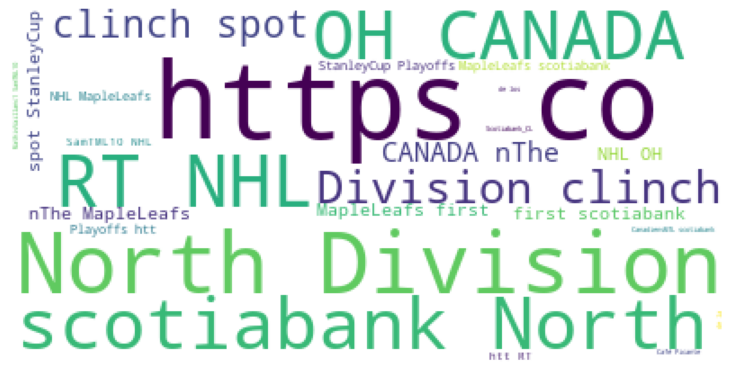

In [220]:
# Creating Wordcloud for all tweets

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
WC = WordCloud(stopwords=stopwords,max_words=25,
               background_color="white").generate(tw_list1['tweets'].to_string())

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show

<function matplotlib.pyplot.show>

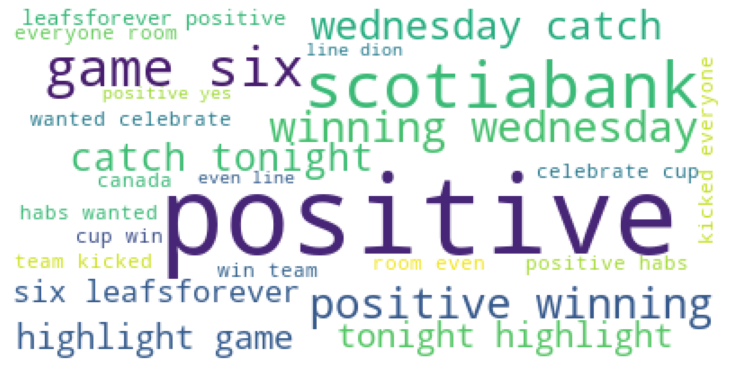

In [222]:
# Creating to Wordcloud for Positive tweets

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
WC = WordCloud(stopwords=stopwords,max_words=25,
               background_color="white").generate(tw_list_positive.to_string())

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show

<function matplotlib.pyplot.show>

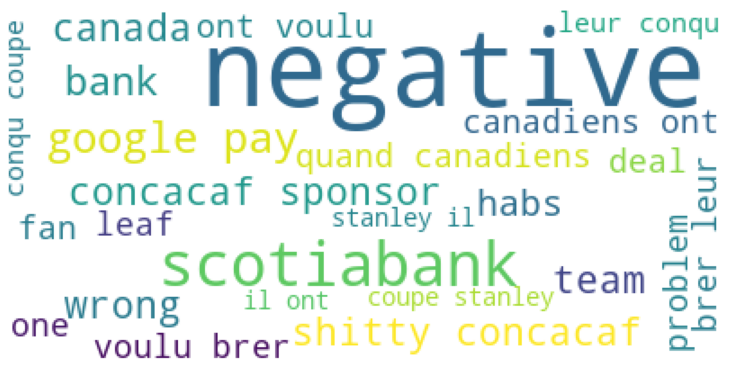

In [223]:
# Creating to Wordcloud for Positive tweets

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
WC = WordCloud(stopwords=stopwords,max_words=25,
               background_color="white").generate(tw_list_negative.to_string())

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show

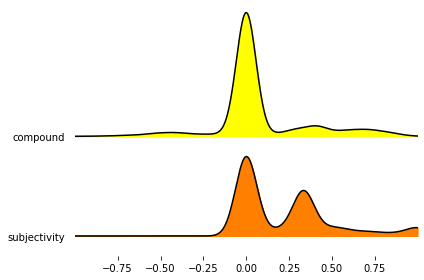

In [241]:
#!pip install joypy
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

%matplotlib inline
fig, axes = joypy.joyplot(tweet_list, column=['compound','subjectivity'], colormap=cm.autumn_r, x_range=[-1,0,1])

References:
https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb

## WIP on the list to be sorted for key words like " arena, playoffs, etc"

In [104]:
tw_list1

tweets
0       RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…
1     @SaddyFandino @PoliciaColombia @AlvaroUribeVel Le recuerdo los saqueos de Cali?\n\nAdemás ellos llevan toda la semana… https://t.co/xi2ZqGatqJ
2       RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…
3       RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…
4       RT @scotiabank: 1/2 Congratulations to the winners of the Canadian Foundation for Economic Education’s Virtual Money Fair, sponsored by Sco…
...                                                                                                                                              ...
1995  RT @NHL: 🍁 OH, CANADA! 🍁\n\nThe @MapleLeafs are the first in the @scotiabank North Division to clinch a spot in the #StanleyCup Playoffs! htt…
1996           @whatsup29832102 @MathisVaillanc1 @NickSuzukisNose @SamTML10 @NHL @MapleLeafs @scotiabank LMAO BRO WHAT DOES WAR HAVE TO DO WITH THIS
1997            @KristinYoun9 @NHL @MapleLeafs @scotiabank They just said that they were the first team to clinch a playoff spot 😂. Let it go Karen.
1998    RT @TheChampions: Vote now for the Scotiabank Man of the Match between @ColumbusCrewSC and @Rayados | #SCCL21 @ScotiabankFC https://t.co/ba…
1999                         @JonathanDrewan @NickSuzukisNose @SamTML10 @MathisVaillanc1 @NHL @MapleLeafs @scotiabank Wrong… https://t.co/EBgjnSqJSD

[2000 rows x 1 columns]

In [131]:
# Import re module to use regular expression
import re
# Declare a list that contains the search word
search_word = "playoff"
list1 = []
# Using lambda expression filter the data
for x in tw_list1['tweets']:
  if "playoff" not in x:
    list1.append(x)
  if "arena" not in x:
    list1.append(x)

In [132]:
list1

['RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…',
 'RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…',
 '@SaddyFandino @PoliciaColombia @AlvaroUribeVel Le recuerdo los saqueos de Cali?\n\nAdemás ellos llevan toda la semana… https://t.co/xi2ZqGatqJ',
 '@SaddyFandino @PoliciaColombia @AlvaroUribeVel Le recuerdo los saqueos de Cali?\n\nAdemás ellos llevan toda la semana… https://t.co/xi2ZqGatqJ',
 'RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…',
 'RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con el Imperio Brit…',
 'RT @EstulinDaniel: @Ange_Vima aquí tienes uno. HSBC es el banco de los Rothschild. A qué se dedican desde hace 200 juno con 